#**Parameter Analysis for the ARIMA model**

## Import the library


In [2]:
%%capture
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima
import pandas as pd


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [9]:
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1.0,15.0,2.015110e+10
1,2015-11-01 01:00:00,1.0,13.0,2.015110e+10
2,2015-11-01 02:00:00,1.0,10.0,2.015110e+10
3,2015-11-01 03:00:00,1.0,7.0,2.015110e+10
4,2015-11-01 04:00:00,1.0,9.0,2.015110e+10


In [10]:
df.drop('ID', axis=1, inplace=True)

Spilt the Data

In [11]:
df = df.iloc[0:100]

## Fit auto_arima function to AirPassengers dataset


In [12]:
stepwise_fit = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 2, max_q = 2, m = 6,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=696.649, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=555.759, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=695.061, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=592.215, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[6] intercept   : AIC=555.515, Time=0.28 sec
 ARIMA(1,0,0)(2,1,1)[6] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(2,1,0)[6] intercept   : AIC=674.661, Time=0.24 sec
 ARIMA(2,0,0)(2,1,0)[6] intercept   : AIC=555.992, Time=0.33 sec
 ARIMA(1,0,1)(2,1,0)[6] intercept   : AIC=556.393, Time=0.29 sec
 ARIMA(0,0,1)(2,1,0)[6] intercept   : AIC=606.563, Time=0.30 sec
 ARIMA(2,0,1)(2,1,0)[6] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(1,0,0)(2,1,0)[6]             : AIC=553.523, Time=0.15 sec
 A

## To print the summary


In [13]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  100
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 6)   Log Likelihood                -272.762
Date:                           Wed, 21 Aug 2024   AIC                            553.523
Time:                                   16:47:57   BIC                            563.696
Sample:                                        0   HQIC                           557.632
                                           - 100                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8769      0.052     16.719      0.000       0.774       0.980
ar.S.L6       -0.6766      0.127     -5.345      0.000      -0.925      -0.429
ar.S.L12      -0.1567      0.117     -1.335      0.182      -0.387       0.073
sigma2        18.6579      2.758      6.765      0.000      13.252      24.063
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                 3.63
Prob(Q):                              0.27   Prob(JB):                         0.16
Heteroskedasticity (H):               1.34   Skew:                             0.47
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [14]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing


## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                   88
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -202.483
Date:                            Wed, 21 Aug 2024   AIC                            414.967
Time:                                    16:47:59   BIC                            426.554
Sample:                                         0   HQIC                           419.594
                                             - 88                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1855      0.116     -1.605      0.108      -0.412       0.041
ar.S.L12      -0.1799      0.376     -0.478      0.633      -0.918       0.558
ar.S.L24       0.2725      0.332      0.821      0.411      -0.378       0.923
ma.S.L12      -0.9993    137.618     -0.007      0.994    -270.726     268.727
sigma2         9.2516   1270.522      0.007      0.994   -2480.926    2499.429
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.92   Prob(JB):                         0.42
Heteroskedasticity (H):               0.82   Skew:                             0.37
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [21]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

## plot predictions and actual values



<Axes: >

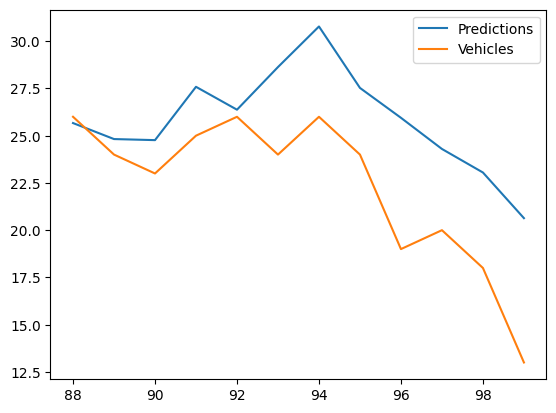

In [22]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [23]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Vehicles"], predictions)

# Calculate mean squared error
mean_squared_error(test["Vehicles"], predictions)

18.165803087875414

#**Well Done :)**